# Time Series Forcasting (시계열 예측)
* In some cases, present state effects to next state.
* Present state is made by previous state and present condition.
* For example,
    - Text auto-complete
    - Heights of ocean tides
    - Wind Velocity
    - Counts of sunspots

* AR(1) Model (Autoregressive):
    - $Y_t = \phi Y_{t-1} + \epsilon_t$
* ARIMA(1,1) Model (AutoRegessive Integrated Moving Average):
    - $Y_t = \phi Y_{t-1} + \theta \epsilon_{t-1} + \epsilon_t$

# RNN: Recurrent Neural Network (순환 신경망)
* is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence.
* can use their internal state (memory) to process variable length sequences of inputs.
* sends the result from activation function in the node of the hidden layer to the output layer and sends it back to the input of the node in the hidden layer.
* (cf. in Feedforward Neural Network, the values that passed the activation function in the hidden layer were directed only toward the output layer.)

![simple_rnn.png](simple_rnn.png)

Simple RNN Model (above) consists of input, output and hidden layer. It is called **Recurrent** Neural Network because output of the node is used as input of the node as it is shown.

At time $t$, $h$ is determined by $X$ at $t$ and $h$ at $t-1$. This can be expressed as:

$$h_t = f(h_{t-1},x_t) = tanh(W_{hh}h_{t-1}+W_{xh}x_t)$$
$$y_t = W_{hy}h_t$$

tanh or ReLU are usually used as activation function because of  gradient vanishing prevention. Derivative of tanh is usually larger than sigmoid as it shown below.


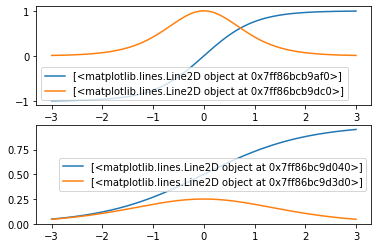

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def deriv_sigmoid(x):
    e = np.exp(-x)
    return e/((1+e)**2)

def deriv_tanh(x):
    return 1-np.tanh(x)**2

domain = np.linspace(-3,3,900)

plt.subplot(211)
func = plt.plot(domain, np.tanh(domain), label='tanh')
deriv = plt.plot(domain, deriv_tanh(domain), label='derivative')
plt.legend([func,deriv])

plt.subplot(212)
func = plt.plot(domain, sigmoid(domain), label='sigmoid')
deriv = plt.plot(domain, deriv_sigmoid(domain), label='derivative')
plt.legend([func,deriv])

plt.show()

RNN could have various form as below:
* one to one
    - Character or Word prediction model
    - e.g.) h → e, love → you
* one to many
    - Captioning image model
    - input: image / output: caption
* many to one
    - Sentence summary model
    - input: sentence / output: summarized word
* many to many
    - Translator
    - input: sentence composed of words
    - output: sentence composed of words

![form_of_rnn.jpeg](form_of_rnn.jpeg)

* Multiple Layer RNN
    - using multiple hidden layer


# Character RNN

Design character RNN learns "hello", sequence of h→e→l→l→o. For example:
* Return 'e' when 'h' is given.
* Return 'l' when 'e' is given.
* Return 'l' when 'l' is given after 'e'.
* Return 'o' when 'l' is given after 'l'.

Perform Numerical Transformation for letters above by one-hot encoding:
* 'h'→$[1,0,0,0]$
* 'e'→$[0,1,0,0]$
* 'l'→$[0,0,1,0]$
* 'o'→$[0,0,0,1]$

(Word can be transformed into numeric as same.)

![helloRNN1.png](helloRNN1.png)

$$h_t = f(h_{t-1},x_t) = tanh(W_{hh}h_{t-1}+W_{xh}x_t)$$

Input size = Output size =4.
Set hidden size = 3 (no matter)
$\Rightarrow (3,3)\times(3,1)+(3,4)\times(4,1)$


* input vector $x$: $4 \times 1$
* $W_{xh}$: $3 \times 4 \quad (hidden\,size) \times (input\,size)$
* Set hidden size = 3
* $h$: $3 \times 1$
* $W_{hh}$: $3 \times 3 \quad (hidden\,size) \times (hidden\,size)$

![helloRNN2.png](helloRNN2.png)

$$y_t = W_{hy}h_t \qquad \Rightarrow (4,3)\times(3,1)=(4,1)$$

* $y$: $4 \times 1$
* $W_{hy}$: $4 \times 3 \quad (output\,size) \times (hidden\,size)$


In [2]:
import numpy as np
from tensorflow.keras import layers
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

# One cell RNN input_dim (4) -> output_dim (3)
x_data = np.array([[h]], dtype=np.float32)

hidden_size = 3
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print(x_data, x_data.shape) # x_0
print(outputs, outputs.shape) # h_0

2021-07-21 22:48:14.437418: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-21 22:48:14.437450: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[[[1. 0. 0. 0.]]] (1, 1, 4)
tf.Tensor([[[ 0.44373775 -0.6493984   0.44392574]]], shape=(1, 1, 3), dtype=float32) (1, 1, 3)


2021-07-21 22:48:16.481024: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-21 22:48:16.481058: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-21 22:48:16.481083: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fennecfox38-13UD580-GX30K): /proc/driver/nvidia/version does not exist
2021-07-21 22:48:16.481322: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# One cell RNN input_dim (4) -> output_dim (3). sequence: 5
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
print(x_data, x_data.shape)

hidden_size = 3
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print(outputs, outputs.shape) # sequence: y[:]
print(states, states.shape) # state: y[-1]

[[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]] (1, 5, 4)
tf.Tensor(
[[[-0.4611585   0.19187419 -0.5106813 ]
  [ 0.05471678 -0.6969605  -0.23458369]
  [ 0.45338786 -0.86541414 -0.23950171]
  [ 0.7239874  -0.8789558  -0.19926643]
  [ 0.1068599  -0.87165004 -0.14845414]]], shape=(1, 5, 3), dtype=float32) (1, 5, 3)
tf.Tensor([[ 0.1068599  -0.87165004 -0.14845414]], shape=(1, 3), dtype=float32) (1, 3)


## ※return_sequence※
* return sequence (all past value of hidden layer)
* variable ```output``` in example above

## ※return_state※
* return state (final value of hidden layer)
* variable ```state``` in example above


---


## Many to Many RNN

* learning "hello" in character unit.
* 'h'→'e','e'→'l','l'→'l','l'→'o'

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

text = "hello"
char_vocab = sorted(list(set(text))) # Set eliminates duplicated.
vocab_size=len(char_vocab)
print(char_vocab)

char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # Assign unique index to letter
print(char_to_index) # Label encoded

_tmp = []
for ch in text:
    _tmp.append(char_to_index[ch])
print("\"hello\" is encoded to:",_tmp)

train_X = [_tmp[:4]]
train_y = [_tmp[1:]]
print("train_x:",train_X,"train_y",train_y)

seq_length = 4
n_samples = 1

['e', 'h', 'l', 'o']
{'e': 0, 'h': 1, 'l': 2, 'o': 3}
"hello" is encoded to: [1, 0, 2, 2, 3]
train_x: [[1, 0, 2, 2]] train_y [[0, 2, 2, 3]]


In [5]:
# One-hot Encoding
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)
print(train_X.shape)
print(train_X)

(1, 4, 3)
[[[0. 1. 0.]
  [1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]]]


In [6]:
n_hidden = 5
model = Sequential()
model.add(layers.SimpleRNN(n_hidden, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(vocab_size, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs = 200, verbose=1)

2021-07-21 22:48:17.164061: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-21 22:48:17.188042: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz


Epoch 1/200
1/1 [==============================] - 1s 917ms/step - loss: 1.2644 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 1.2605 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 1.2567 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 1.2528 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 1.2490 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 1.2451 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 1.2413 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 1.2375 - accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 1.2337 - accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 1.2300 - accuracy: 0.5000
Epoch 11/200
1/1 [=======

Epoch 167/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7647 - accuracy: 0.7500
Epoch 168/200
1/1 [==============================] - 0s 7ms/step - loss: 0.7618 - accuracy: 1.0000
Epoch 169/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7589 - accuracy: 1.0000
Epoch 170/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7560 - accuracy: 1.0000
Epoch 171/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7531 - accuracy: 1.0000
Epoch 172/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7502 - accuracy: 1.0000
Epoch 173/200
1/1 [==============================] - 0s 6ms/step - loss: 0.7473 - accuracy: 1.0000
Epoch 174/200
1/1 [==============================] - 0s 6ms/step - loss: 0.7444 - accuracy: 1.0000
Epoch 175/200
1/1 [==============================] - 0s 7ms/step - loss: 0.7415 - accuracy: 1.0000
Epoch 176/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7386 - accuracy: 1.0000
Epoch 177/

In [7]:
pred = model.predict(train_X)
print(pred)
print(np.argmax(pred, 2))

[[[0.44261405 0.11810405 0.33264175 0.10664018]
  [0.11910401 0.1047893  0.52204674 0.25406003]
  [0.13879818 0.05481905 0.6216832  0.1846996 ]
  [0.08293605 0.07239868 0.3582268  0.48643845]]]
[[0 2 2 3]]


It returns "ello" when "hell" is given.

Keep in mind that we use ```softmax``` as activation function in dense layer and wrap it with ```TimeDistributed``` layer

## TimeDistributed layer
> from [keras.io](https://keras.io/api/layers/recurrent_layers/time_distributed/)
>
>```tf.keras.layers.TimeDistributed(layer)```
>
>This wrapper allows to apply a layer to every temporal slice of an input.

Many to one model cares only final value ```y[-1]```

TimeDistributed layer allows it works as 'many to many models'.
Calculate cost in all output node by time.

keras would calculate cose in many to one method if dense layer is not wrapped with TimeDistributed Layer.

![TimeDistributed.png](TimeDistributed.png)


## Many to one RNN

Sequence classification

eg. classify polarity of sentence
* sequence: sentence
* tokens: word

['This movie is good']

↓ Tokenization

['This','movie','is','good']

↓ Classification

Positive

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# example data
words = ['good', 'bad', 'worse', 'so good']
y_data = [[1],[0],[0],[1]]

# creating a token dictionary
# join all words and eliminate duplicates (using set) and add '<pad>'
# make dictionary bidirectionally
char_set = ['<pad>'] + sorted(list(set(''.join(words))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad>', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad>': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [9]:
# converting sequence of tokens to sequence of indices
# use lambda function to mapping
# charactor to index / length
x_data = list(map(lambda word : [char2idx.get(char) for char in word], words))
x_data_len = list(map(lambda word : len(word), x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [10]:
# padding the sequence of indices
max_sequence = 10
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                       padding = 'post', truncating = 'post')
y_data = np.array(y_data)

# checking data
print(x_data)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[[1]
 [0]
 [0]
 [1]]


## Creating model

```np.eye(x)```: Identity Matrix $I_x$

### Embedding Layer
* Dimension Reduction Embedding
* One-hot encoded would be sparse matrix (most of its value is 0) which is wasting memory.
* Embedding vector reduce dimension while explicating similarity between words.

* Realize embedding vector using CBOW, skip-gram model

![embeddinglayer.png](embeddinglayer.png)
![embeddinglayer2.png](embeddinglayer2.png)

### CBOW: Continuous bag of words
* CBOW is neuron network model predicting the central word from the surrounding words. 
* Learning central and surrounding word dataset generated by the sliding window with changing central dataset.

![SlidingWindow.png](SlidingWindow.png)

* Summarizing surrounding words while learning model that explains central word using the surrounding word.

* Hidden layer value made by dimension reduction becomes embedding vector that explains central word well.

### Projection Layer

Below is example of analyzing "cat sat on"
* Size of projection layer ($M=5$) is usually set smaller than output layer.
* $V$ is length of one-hot vector.
* $W$ is weight of input contributing projection
* $V_{cat}$ and $V_{on}$ can be merged into M since these have one-hot structure.

![ProjectionLayer.png](ProjectionLayer.png)


### using class ```tensorflow.keras.layers.Embedding```

```python
# from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim=input_dim,
                                 output_dim=output_dim,
                                 mask_zero=True,
                                 input_length=max_sequence,
                                 embedding_initializer=keras.initializer.Constant(one_hot)))
```

Note that:
* ```input_dim```: size of one_hot vector
* ```output_dim```: size of output on embedding
* use option ```mask_zero=True``` in order to prevent from learning zero-padded part

### ```loss='sparse_categorical_crossentropy'``` (손실함수: 희소범주 교차엔트로피)

* Use 'Sparse Categorical Cross Entropy function as loss function
* 'Sparse Categorical Cross Entropy' function is used when **non-'one-hot encoded' output is given**.

In [11]:
# creating SimpleRNN for "many to one" classification
input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx)) # Identity Matrix
hidden_size = 10
num_classes = 2 # Calculate probabilites whether it is 0 or 1

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim, mask_zero=True, input_length=max_sequence, embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units=hidden_size))
model.add(layers.Dense(units=num_classes))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 11)            121       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 10)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________


In [12]:
x_data


array([[ 6,  7,  7,  4,  0,  0,  0,  0,  0,  0],
       [ 3,  2,  4,  0,  0,  0,  0,  0,  0,  0],
       [10,  7,  8,  9,  5,  0,  0,  0,  0,  0],
       [ 9,  7,  1,  6,  7,  7,  4,  0,  0,  0]], dtype=int32)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_data, y_data, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.5892 - accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5675 - accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5462 - accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.5251 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 12ms/step - loss: 0.5042 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4833 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 14ms/step - loss: 0.4624 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 13ms/step - loss: 0.4412 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4199 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 10ms/step - loss: 0.3981 - accuracy: 1.0000
Epoch 11/30
1/1 [================

In [14]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print(y_data, yhat)

[[1]
 [0]
 [0]
 [1]] [1 0 0 1]
